## Load data

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "co2_emissions_from_agri.csv"  # Update this if needed
df = pd.read_csv(file_path)

# Display the shape and first few rows
print(f"Shape of dataset: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Shape of dataset: (6965, 31)

First 5 rows:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils 

## Clean up

In [3]:
# Step 1: Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_values)

# Step 2: Option 1 - Fill missing values (example: fill with 0)
df_filled = df.fillna(0)

# Step 3: Check for duplicates and drop them
duplicates = df_filled.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df_clean = df_filled.drop_duplicates()

# Step 4: Clean column names
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('°', 'deg').str.replace(r'[^\w_]', '', regex=True)

# Final overview
print("\nCleaned dataset preview:")
print(df_clean.head())

Missing values per column:
 Crop Residues                      1389
On-farm energy use                  956
Manure Management                   928
Manure applied to Soils             928
IPPU                                743
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Fires in humid tropical forests     155
Forest fires                         93
Savanna fires                        31
Drained organic soils (CO2)           0
Rice Cultivation                      0
Area                                  0
Year                                  0
Food Packaging                        0
On-farm Electricity Use               0
Food Retail                           0
Pesticides Manufacturing              0
Food Transport                        0
Food Processing                       0
Fertilizers Manufacturing             0
Agrifood Systems Waste Disposal       0
Fires in organic soils                0
Manure left 

fill Nans with means

In [4]:
df = pd.read_csv("co2_emissions_from_agri.csv")

# Step 1: Check which columns have missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

# Step 2: Fill numeric columns with column mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

# Step 3: Drop duplicates
df = df.drop_duplicates()

# Step 4: Clean column names
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('°', 'deg')
    .str.replace(r'[^\w_]', '', regex=True)
)

# Preview cleaned data
print("\n✅ Cleaned data preview:")
print(df.head())

Missing values per column:
 Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
IPPU                                743
Manure applied to Soils             928
Manure Management                   928
Fires in humid tropical forests     155
On-farm energy use                  956
dtype: int64

✅ Cleaned data preview:
          area  year  savanna_fires  forest_fires  crop_residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   rice_cultivation  drained_organic_soils_co2  pesticides_manufacturing  \
0        

# bringing in cleaned data 

In [5]:
# === Load Cleaned CO₂ Emissions Data ===
file_path = "co2_emissions_from_agri_cleaned.csv"  # Adjust path if needed

# Read the CSV
df = pd.read_csv(file_path)

# Optional: View basic info
print(f"✅ Data loaded successfully with shape: {df.shape}")
print("\n📋 Column Preview:")
print(df.columns.tolist())
print("\n🔍 Sample Data:")
print(df.head())

✅ Data loaded successfully with shape: (6965, 31)

📋 Column Preview:
['area', 'year', 'savanna_fires', 'forest_fires', 'crop_residues', 'rice_cultivation', 'drained_organic_soils_co2', 'pesticides_manufacturing', 'food_transport', 'forestland', 'net_forest_conversion', 'food_household_consumption', 'food_retail', 'onfarm_electricity_use', 'food_packaging', 'agrifood_systems_waste_disposal', 'food_processing', 'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils', 'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils', 'fires_in_humid_tropical_forests', 'onfarm_energy_use', 'rural_population', 'urban_population', 'total_population__male', 'total_population__female', 'total_emission', 'average_temperature_degc']

🔍 Sample Data:
          area  year  savanna_fires  forest_fires  crop_residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.723

# Views 

In [6]:
#import of registory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
df = pd.read_csv("co2_emissions_from_agri_cleaned.csv")

c:\ProgramData\anaconda3\envs\Python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


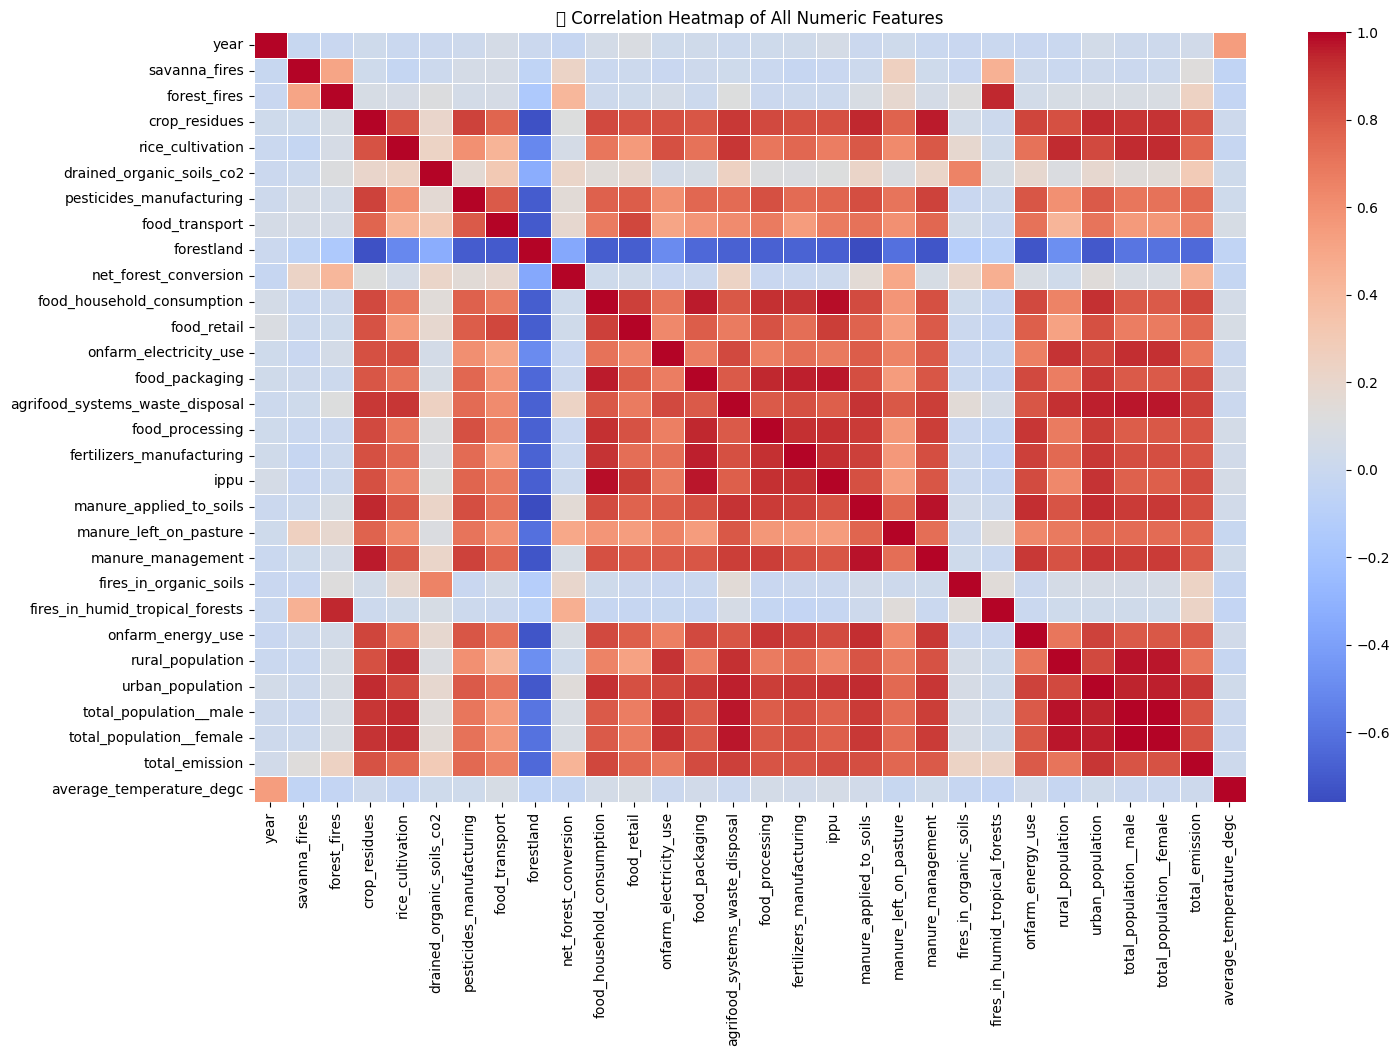

In [8]:
#heatmap view
plt.figure(figsize=(16,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("📌 Correlation Heatmap of All Numeric Features")
plt.show()

In [9]:
#Emission Drivers 
target = 'total_emission'
correlations = df.corr(numeric_only=True)[target].drop(target)
top_5 = correlations.abs().sort_values(ascending=False).head(5)
print("🔝 Top 5 drivers of total_emission:\n", top_5)

🔝 Top 5 drivers of total_emission:
 urban_population                   0.907774
agrifood_systems_waste_disposal    0.879840
food_household_consumption         0.860020
ippu                               0.848324
food_packaging                     0.842555
Name: total_emission, dtype: float64


c:\ProgramData\anaconda3\envs\Python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


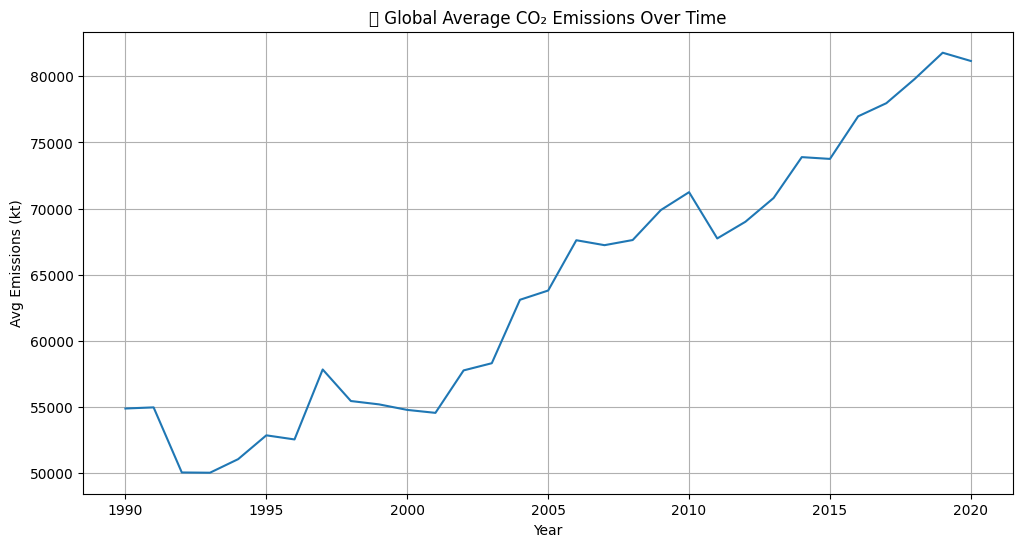

In [10]:
# Global average emission trend
plt.figure(figsize=(12,6))
df.groupby("year")["total_emission"].mean().plot()
plt.title("🌍 Global Average CO₂ Emissions Over Time")
plt.ylabel("Avg Emissions (kt)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

📈 R² score: -0.000
🧮 MSE: 0.307


c:\ProgramData\anaconda3\envs\Python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


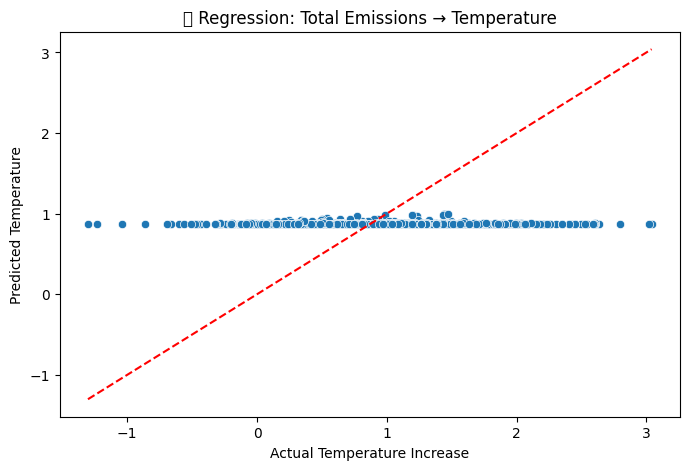

In [11]:
# Features & target
X = df[["total_emission"]]
y = df["average_temperature_degc"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print(f"📈 R² score: {r2_score(y_test, y_pred):.3f}")
print(f"🧮 MSE: {mean_squared_error(y_test, y_pred):.3f}")

# Plot regression
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Temperature Increase")
plt.ylabel("Predicted Temperature")
plt.title("🔁 Regression: Total Emissions → Temperature")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

🔝 Top 5 drivers of total_emission (|corr|):
1. urban_population: 0.9078
2. agrifood_systems_waste_disposal: 0.8798
3. food_household_consumption: 0.8600
4. ippu: 0.8483
5. food_packaging: 0.8426

📈 Model performance:
R²:  0.8831
MSE: 8089441475.341

📋 Coefficients (sorted by |value|):
                        feature  coefficient
agrifood_systems_waste_disposal     6.245964
     food_household_consumption     2.104384
                 food_packaging    -1.524524
                           ippu     0.701261
               urban_population    -0.000410


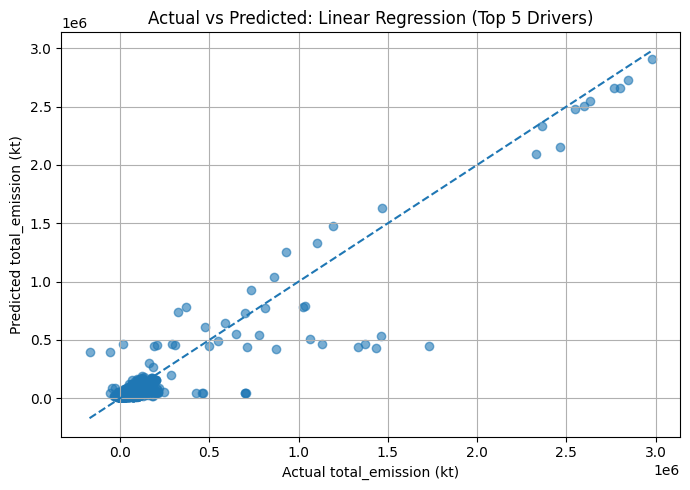

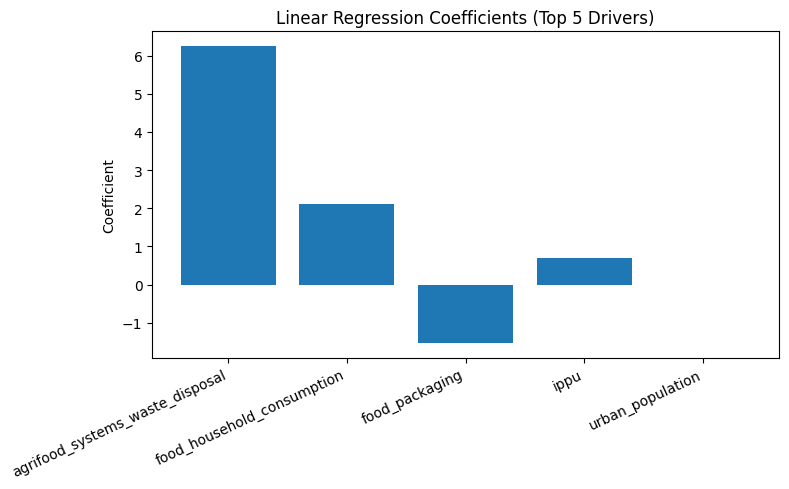

In [17]:
import numpy as np

# ----- Use existing DataFrame -----
# Prefer df_cleaned if it exists; otherwise use df
_df = None
if 'df_cleaned' in globals():
    _df = df_cleaned.copy()
elif 'df' in globals():
    _df = df.copy()
else:
    raise RuntimeError("No DataFrame found. Please ensure `df_cleaned` or `df` is already loaded.")



# Sanity check
if "total_emission" not in _df.columns:
    raise KeyError("Column 'total_emission' not found in your DataFrame.")

# ----- 1) Top 5 drivers by absolute correlation with total_emission -----
corr = _df.corr(numeric_only=True)
drivers = (
    corr["total_emission"]
    .drop(labels=["total_emission"])
    .abs()
    .sort_values(ascending=False)
    .head(5)
)
top5_features = drivers.index.tolist()

print("🔝 Top 5 drivers of total_emission (|corr|):")
for i, (feat, val) in enumerate(drivers.items(), start=1):
    print(f"{i}. {feat}: {val:.4f}")

# ----- 2) Train/Test split + Linear Regression -----
X = _df[top5_features].copy()
y = _df["total_emission"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n📈 Model performance:")
print(f"R²:  {r2:.4f}")
print(f"MSE: {mse:.3f}")

# ----- 3) Coefficients table -----
coef_df = pd.DataFrame({
    "feature": top5_features,
    "coefficient": model.coef_
}).sort_values("coefficient", key=np.abs, ascending=False)

print("\n📋 Coefficients (sorted by |value|):")
print(coef_df.to_string(index=False))

# ----- 4) Plots (matplotlib only) -----

# (a) Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], linestyle='--')
plt.xlabel("Actual total_emission (kt)")
plt.ylabel("Predicted total_emission (kt)")
plt.title("Actual vs Predicted: Linear Regression (Top 5 Drivers)")
plt.grid(True)
plt.tight_layout()
plt.show()

# (b) Feature Coefficients (bar chart)
plt.figure(figsize=(8, 5))
plt.bar(coef_df["feature"], coef_df["coefficient"])
plt.xticks(rotation=25, ha='right')
plt.ylabel("Coefficient")
plt.title("Linear Regression Coefficients (Top 5 Drivers)")
plt.tight_layout()
plt.show()


c:\ProgramData\anaconda3\envs\Python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


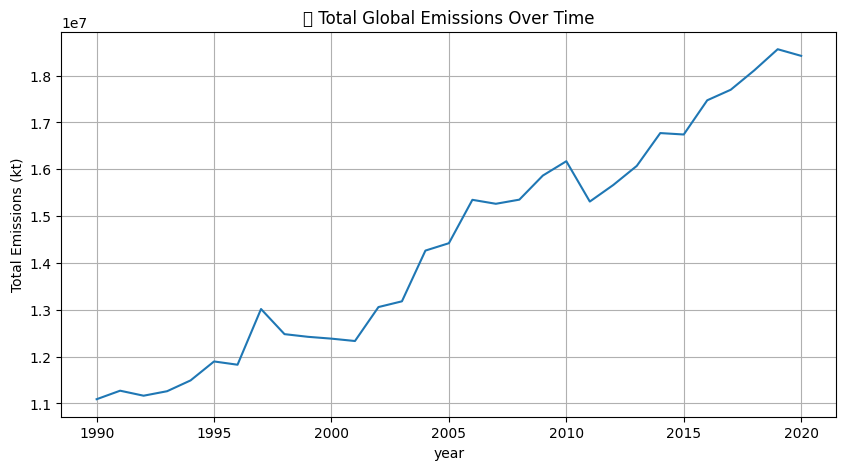

In [18]:
#track how emissions change over the years 
# Total global emissions over time
df.groupby("year")["total_emission"].sum().plot(title="🌍 Total Global Emissions Over Time", figsize=(10,5))
plt.ylabel("Total Emissions (kt)")
plt.grid(True)
plt.show()

In [19]:
#Rank vountry emissions
# Average emissions per country
top_emitters = df.groupby("area")["total_emission"].mean().sort_values(ascending=False).head(10)
bottom_emitters = df.groupby("area")["total_emission"].mean().sort_values().head(10)

print("🔥 Top 10 emitting countries:\n", top_emitters)
print("\n❄️ Bottom 10 emitting countries:\n", bottom_emitters)

🔥 Top 10 emitting countries:
 area
China                               1.895156e+06
China, mainland                     1.826588e+06
Brazil                              1.180523e+06
Indonesia                           9.102055e+05
United States of America            7.480930e+05
India                               6.361396e+05
Democratic Republic of the Congo    5.356887e+05
USSR                                5.224774e+05
Canada                              3.160855e+05
Japan                               2.233256e+05
Name: total_emission, dtype: float64

❄️ Bottom 10 emitting countries:
 area
Russian Federation      -149095.025128
Chile                    -18746.236023
Romania                  -15413.679832
Bulgaria                 -10026.830652
Serbia and Montenegro     -4238.475985
Finland                   -3217.760716
Slovenia                  -2257.375324
Latvia                    -1762.252098
Georgia                   -1631.233624
Bhutan                       -0.778155
Name: to

C:\Users\Millpark\AppData\Local\Temp\ipykernel_41084\1249404779.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_stats = df.groupby("urban_level")["total_emission"].mean()
c:\ProgramData\anaconda3\envs\Python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


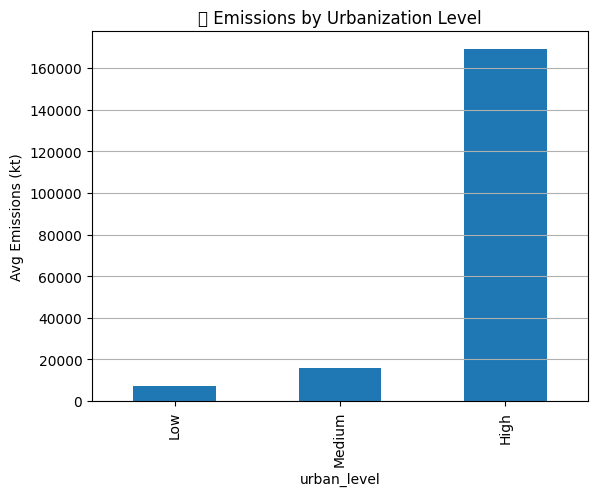

In [20]:
#compare urban and rural drivers 
# Define urbanization level
df["urban_level"] = pd.qcut(df["urban_population"], q=3, labels=["Low", "Medium", "High"])
urban_stats = df.groupby("urban_level")["total_emission"].mean()

urban_stats.plot(kind='bar', title="💡 Emissions by Urbanization Level")
plt.ylabel("Avg Emissions (kt)")
plt.grid(axis='y')
plt.show()

c:\ProgramData\anaconda3\envs\Python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


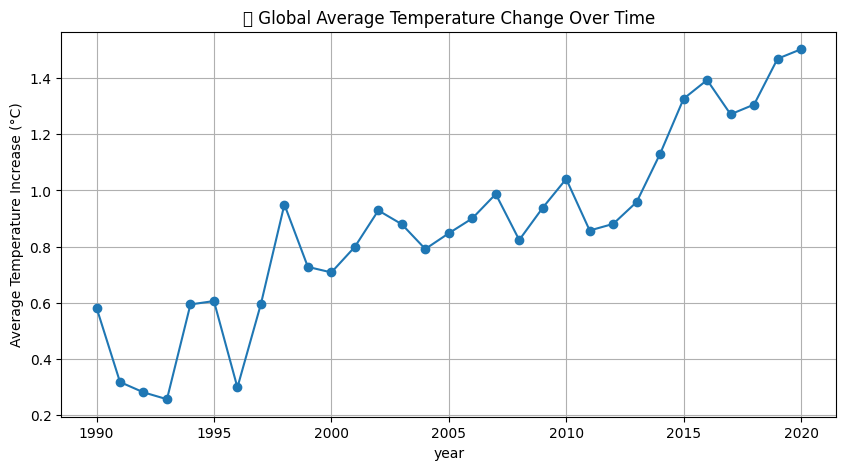

In [22]:
# Global average temperature change over time
df.groupby("year")["average_temperature_degc"].mean().plot(figsize=(10,5), marker='o')
plt.title("🌍 Global Average Temperature Change Over Time")
plt.ylabel("Average Temperature Increase (°C)")
plt.grid(True)
plt.show()

c:\ProgramData\anaconda3\envs\Python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


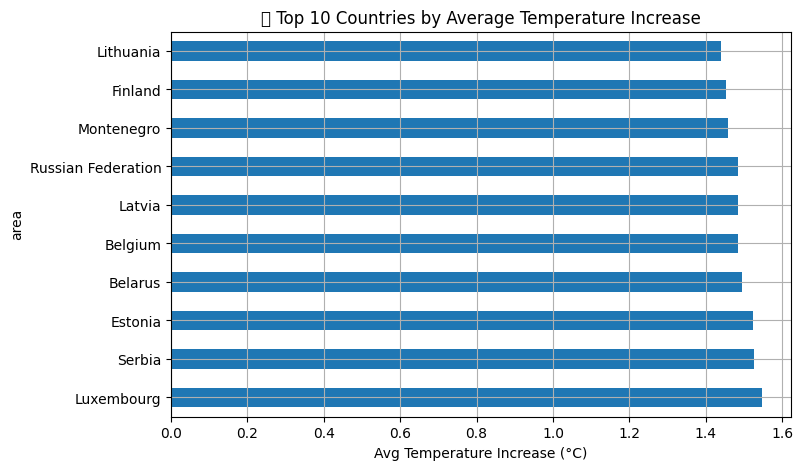

In [23]:
#Top 10 Countries with the Highest Temperature Increase (on avg)
top_temp = df.groupby("area")["average_temperature_degc"].mean().sort_values(ascending=False).head(10)
top_temp.plot(kind='barh', title="🔥 Top 10 Countries by Average Temperature Increase", figsize=(8,5))
plt.xlabel("Avg Temperature Increase (°C)")
plt.grid(True)
plt.show()

In [24]:
#Which emission types correlate most with temperature rise?
# Correlation with temperature
temp_corr = df.corr(numeric_only=True)["average_temperature_degc"].drop("average_temperature_degc")
top_temp_corr = temp_corr.sort_values(ascending=False).head(5)
print("🔍 Emission sources most correlated with temperature rise:")
print(top_temp_corr)

🔍 Emission sources most correlated with temperature rise:
year                          0.545932
food_transport                0.075724
food_retail                   0.073404
ippu                          0.060064
food_household_consumption    0.053663
Name: average_temperature_degc, dtype: float64


In [25]:
#future predictions of temperature from emissions
# Use all emission sources to predict average temperature
emission_features = df.select_dtypes(include='number').drop(columns=["average_temperature_degc", "year"]).columns
X_temp = df[emission_features]
y_temp = df["average_temperature_degc"]

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

model_temp = LinearRegression()
model_temp.fit(X_train, y_train)
y_pred_temp = model_temp.predict(X_test)

print(f"📈 R² score (temperature model): {r2_score(y_test, y_pred_temp):.4f}")
print(f"🧮 MSE: {mean_squared_error(y_test, y_pred_temp):.4f}")

📈 R² score (temperature model): 0.0314
🧮 MSE: 0.2969


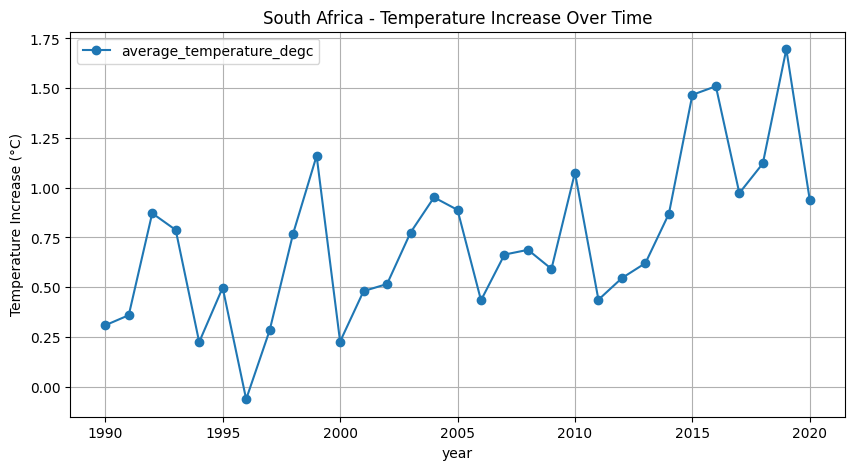

In [29]:
#South Africa specific temperature trend 
country = "South Africa"  # Change to any valid country
df[df["area"] == country].plot(x="year", y="average_temperature_degc", figsize=(10,5), marker='o')
plt.title(f"{country} - Temperature Increase Over Time")
plt.ylabel("Temperature Increase (°C)")
plt.grid(True)
plt.show()

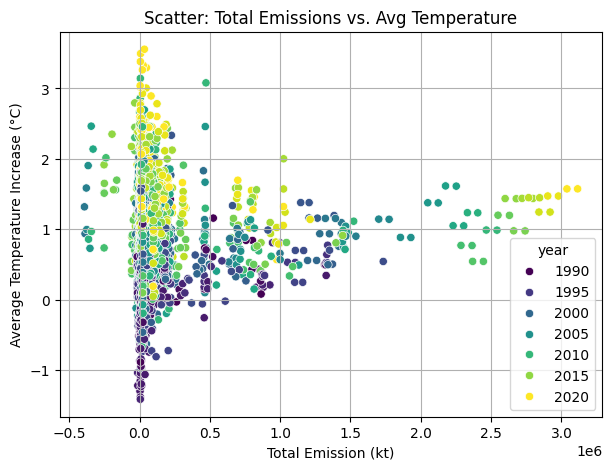

In [30]:
#Emissions vs temperature 
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="total_emission", y="average_temperature_degc", hue="year", palette="viridis")
plt.title("Scatter: Total Emissions vs. Avg Temperature")
plt.xlabel("Total Emission (kt)")
plt.ylabel("Average Temperature Increase (°C)")
plt.grid(True)
plt.show()

The agri-food sector is a major driver of climate-altering emissions, and its downstream activities are just as impactful as farming itself.
By focusing on high-impact drivers and linking them to temperature outcomes, this analysis helps inform evidence-based strategies to combat climate change through sustainable agri-food practices.